In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np

In [29]:
image_set = tf.keras.utils.image_dataset_from_directory("dataset/train", batch_size=32, image_size=(32,32))
test_image_set = tf.keras.utils.image_dataset_from_directory("dataset/test", batch_size=32, image_size=(32,32))

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [30]:
for data_batch, labels_batch in image_set:
    X_train = data_batch
    y_train = labels_batch

for data_batch, labels_batch in test_image_set:
    X_test = data_batch
    y_test = labels_batch

In [18]:
X_train.shape

(27, 32, 32, 1)

In [31]:
X_train = np.sum(X_train / 3, axis=3, keepdims=True)
X_test = np.sum(X_train / 3, axis=3, keepdims=True)

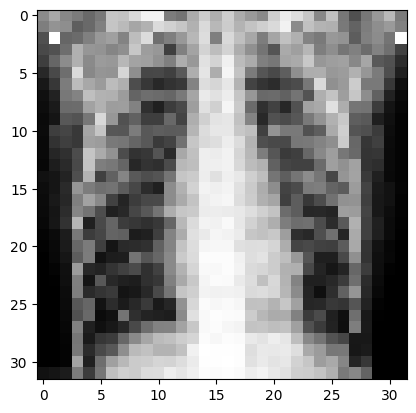

In [20]:
number_random = random.randint(0,20)
plt.imshow(X_train[number_random], cmap='gray')

In [21]:
y_train

<tf.Tensor: shape=(27,), dtype=int32, numpy=
array([0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2,
       0, 0, 2, 1, 1])>

In [23]:
X_train

array([[[[4.6224121e+01],
         [5.0094727e+01],
         [9.0397461e+01],
         ...,
         [5.1109375e+01],
         [5.0000000e+01],
         [4.9093750e+01]],

        [[4.4706055e+01],
         [3.9552246e+01],
         [3.9796875e+01],
         ...,
         [4.8000000e+01],
         [4.7000000e+01],
         [4.7219238e+01]],

        [[4.3000000e+01],
         [4.1000000e+01],
         [3.7000000e+01],
         ...,
         [4.5453125e+01],
         [4.4000000e+01],
         [4.3906250e+01]],

        ...,

        [[1.5941260e+02],
         [1.8128125e+02],
         [2.1069385e+02],
         ...,
         [2.2889990e+02],
         [2.2219824e+02],
         [1.8075195e+02]],

        [[1.6079492e+02],
         [1.8851416e+02],
         [2.0077051e+02],
         ...,
         [2.2606006e+02],
         [2.0750439e+02],
         [2.0729883e+02]],

        [[1.5673926e+02],
         [1.8548438e+02],
         [1.9668750e+02],
         ...,
         [2.1410059e+02],
        

In [24]:
X_train = (X_train - 128) / 128
X_test = (X_test - 128) / 128

In [25]:
X_train

array([[[[-0.63887405],
         [-0.60863495],
         [-0.29376984],
         ...,
         [-0.600708  ],
         [-0.609375  ],
         [-0.6164551 ]],

        [[-0.65073395],
         [-0.6909981 ],
         [-0.6890869 ],
         ...,
         [-0.625     ],
         [-0.6328125 ],
         [-0.6310997 ]],

        [[-0.6640625 ],
         [-0.6796875 ],
         [-0.7109375 ],
         ...,
         [-0.64489746],
         [-0.65625   ],
         [-0.6569824 ]],

        ...,

        [[ 0.24541092],
         [ 0.41625977],
         [ 0.6460457 ],
         ...,
         [ 0.7882805 ],
         [ 0.73592377],
         [ 0.41212463]],

        [[ 0.25621033],
         [ 0.47276688],
         [ 0.5685196 ],
         ...,
         [ 0.7660942 ],
         [ 0.6211281 ],
         [ 0.6195221 ]],

        [[ 0.22452545],
         [ 0.44909668],
         [ 0.5366211 ],
         ...,
         [ 0.6726608 ],
         [ 0.55090714],
         [ 0.3327942 ]]],


       [[[-1.        ],


In [27]:
lenet = tf.keras.Sequential()
lenet.add(tf.keras.layers.Conv2D(6, (5,5), activation='relu', input_shape=(32,32,1)))
lenet.add(tf.keras.layers.AveragePooling2D())
lenet.add(tf.keras.layers.Conv2D(16, (5,5), activation='relu'))
lenet.add(tf.keras.layers.AveragePooling2D())
lenet.add(tf.keras.layers.Flatten())
lenet.add(tf.keras.layers.Dense(units=128, activation='relu'))
lenet.add(tf.keras.layers.Dense(units=84, activation='relu'))
lenet.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [28]:
lenet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')
history = lenet.fit(X_train, y_train, epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 995ms/step - loss: 1.1026
Epoch 2/50
1/1 [==============================] - 0s 12ms/step - loss: 1.0289
Epoch 3/50
1/1 [==============================] - 0s 13ms/step - loss: 0.9714
Epoch 4/50
1/1 [==============================] - 0s 13ms/step - loss: 0.9168
Epoch 5/50
1/1 [==============================] - 0s 14ms/step - loss: 0.8592
Epoch 6/50
1/1 [==============================] - 0s 13ms/step - loss: 0.8002
Epoch 7/50
1/1 [==============================] - 0s 11ms/step - loss: 0.7411
Epoch 8/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6827
Epoch 9/50
1/1 [==============================] - 0s 13ms/step - loss: 0.6252
Epoch 10/50
1/1 [==============================] - 0s 12ms/step - loss: 0.5673
Epoch 11/50
1/1 [==============================] - 0s 14ms/step - loss: 0.5108
Epoch 12/50
1/1 [==============================] - 0s 12ms/step - loss: 0.4563
Epoch 13/50
1/1 [==============================] - 0s 10ms/s

1/1 [==============================] - 0s 29ms/step


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 2 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

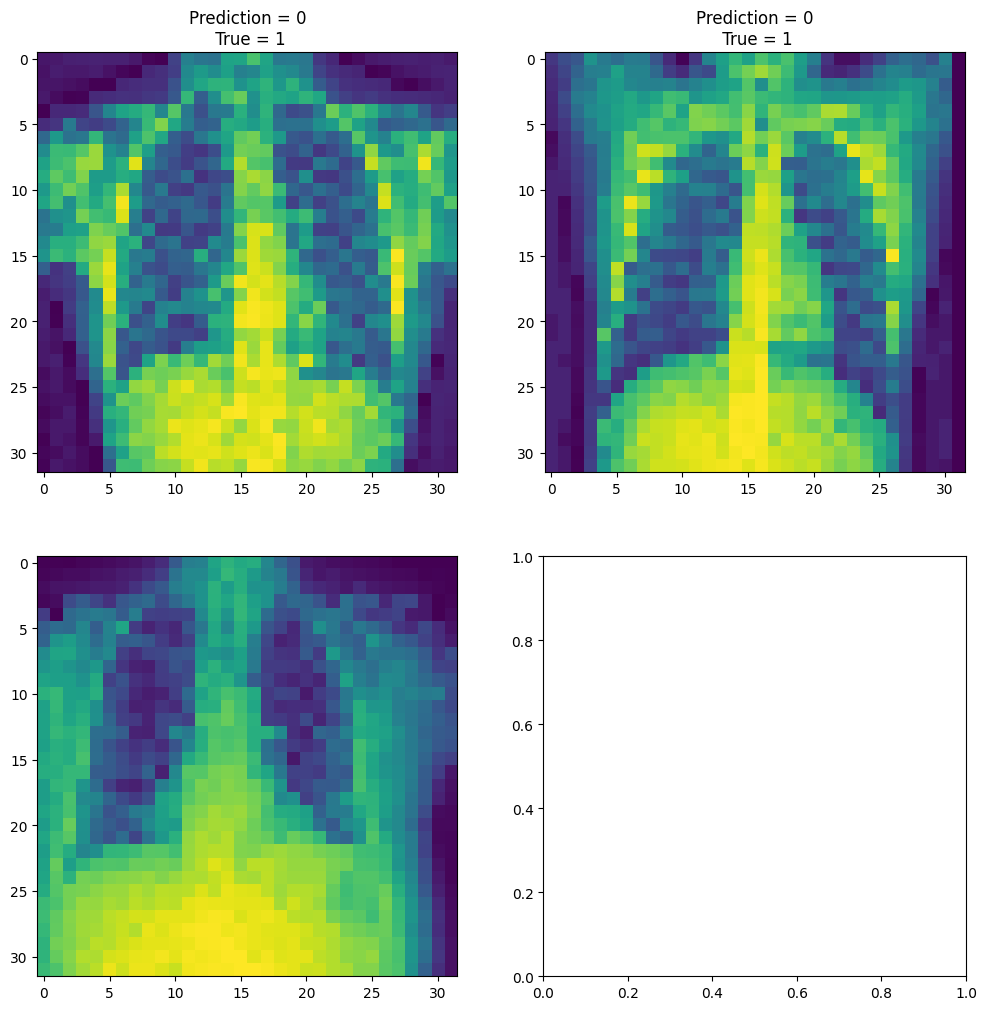

In [35]:
L = 2
W = 2
predicted_classes = np.argmax(lenet.predict(X_test), axis=1)
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_true = y_test
for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('on')
plt.subplots_adjust(wspace = 1)